## Laptop Price Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

## Importing Dataset

In [2]:
df = pd.read_csv('Laptops.csv')
df.head(10)

,Unnamed: 0,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
5,5,Lenovo,V15 G3 IAP,Core i7,Windows 11 Home,512 GB,16 GB,39.62 cm (15.6 Inch),No,"₹49,990"
6,6,ASUS,X515EA-EJ522WS,Core i5,Windows 11 Home,NaN,8 GB,39.62 cm (15.6 Inch),No,"₹40,990"
7,7,HP,15s- fr4000TU,Core i5,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹46,990"
8,8,ASUS,X1500EA-EJ311W,Core i3,Windows 11 Home,256 GB,8 GB,39.62 cm (15.6 Inch),No,"₹27,990"
9,9,HP,15-fb0147AX,Ryzen 5 Hexa Core,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹45,990"


## EDA

In [3]:
df.shape

(837, 10)

In [4]:
df = df.drop(df.columns[0], axis = 1)
df.head(10)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
5,Lenovo,V15 G3 IAP,Core i7,Windows 11 Home,512 GB,16 GB,39.62 cm (15.6 Inch),No,"₹49,990"
6,ASUS,X515EA-EJ522WS,Core i5,Windows 11 Home,NaN,8 GB,39.62 cm (15.6 Inch),No,"₹40,990"
7,HP,15s- fr4000TU,Core i5,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹46,990"
8,ASUS,X1500EA-EJ311W,Core i3,Windows 11 Home,256 GB,8 GB,39.62 cm (15.6 Inch),No,"₹27,990"
9,HP,15-fb0147AX,Ryzen 5 Hexa Core,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹45,990"


In [5]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

df.to_csv('new_laptops.csv', index=False)

In [6]:
numerical_df = df.select_dtypes(include=['number']).columns
categorical_df = df.select_dtypes(exclude=['number']).columns

In [7]:
numerical_df

Index(['Price'], dtype='object')

In [8]:
df.isnull().sum()

Brand                0
Model Name           0
Processor            0
Operating System     0
Storage             12
RAM                  0
Screen Size          0
Touch_Screen         0
Price                0
dtype: int64

In [9]:
df['Storage'].mode()

0    512 GB
Name: Storage, dtype: object

In [10]:
from sklearn.impute import SimpleImputer

impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['Storage']])
df[['Storage']] = impute_mode.transform(df[['Storage']])

In [11]:
df.isnull().sum()

Brand               0
Model Name          0
Processor           0
Operating System    0
Storage             0
RAM                 0
Screen Size         0
Touch_Screen        0
Price               0
dtype: int64

Text(4.944444444444445, 0.5, 'Number Of Laptops')

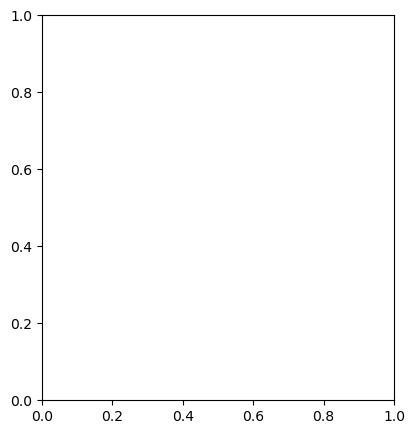

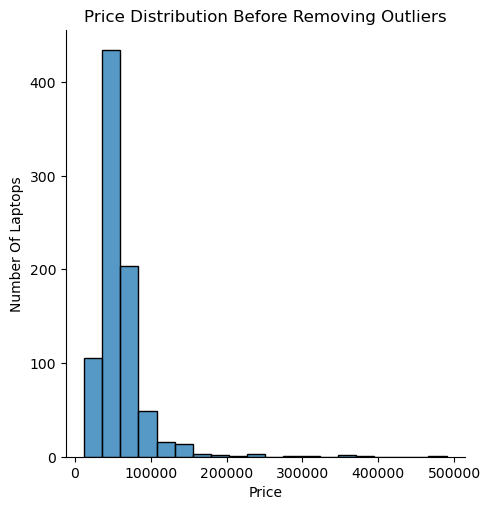

In [12]:
col_Price = 'Price'
col_Price_data = df[col_Price]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.displot(col_Price_data, kde = False, bins = 20)
plt.title('Price Distribution Before Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Number Of Laptops')

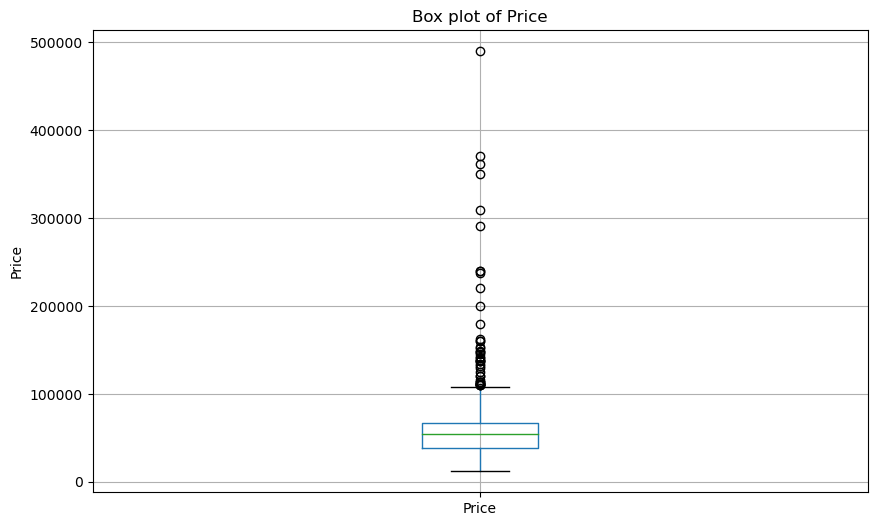

In [13]:
plt.figure(figsize=(10, 6))
df[[col_Price]].boxplot()
plt.title('Box plot of Price')
plt.ylabel('Price')
plt.xticks([1], [col_Price])
plt.grid(True)
plt.show()

In [14]:
col_Price = 'Price'
col_Price_data = df[col_Price]

Q1_Price = col_Price_data.quantile(0.25)
Q3_Price = col_Price_data.quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
upper_bound_Price = Q3_Price + (1.5 * IQR_Price)
lower_bound_Price = Q1_Price - (1.5 * IQR_Price)
outliers_Price = (col_Price_data < lower_bound_Price) | (col_Price_data > upper_bound_Price)

print("First Quartile for the column 'Price' (Q1):", Q1_Price)
print("Third Quartile for the column 'Price' (Q3):", Q3_Price)
print("Interquartile Range for the column 'Price' (IQR):", IQR_Price)
print("Upper Bound:", upper_bound_Price)
print("Lower Bound:", lower_bound_Price)
print("Outliers for the column 'Price' :- \n", outliers_Price.head(10))

First Quartile for the column 'Price' (Q1): 38990.0
Third Quartile for the column 'Price' (Q3): 66999.0
Interquartile Range for the column 'Price' (IQR): 28009.0
Upper Bound: 109012.5
Lower Bound: -3023.5
Outliers for the column 'Price' :- 
 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Price, dtype: bool


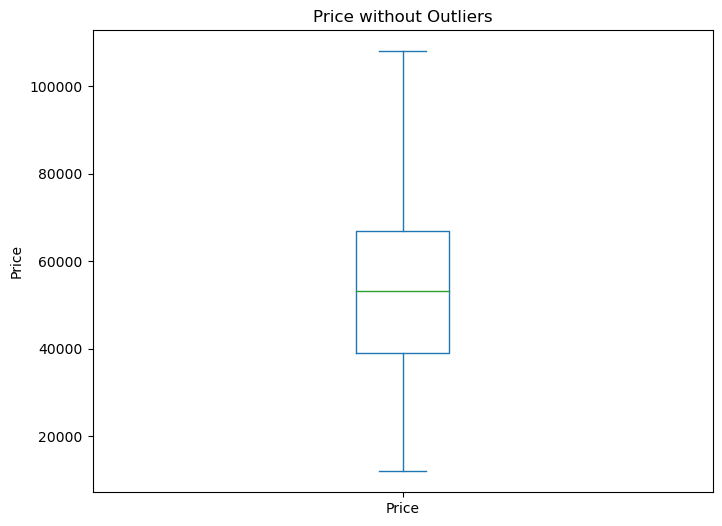

In [15]:
plt.figure(figsize=(8, 6))
col_Price_data[~outliers_Price].plot(kind='box')
plt.title('Price without Outliers')
plt.ylabel('Price')
plt.show()

Text(4.944444444444445, 0.5, 'Number Of Laptops')

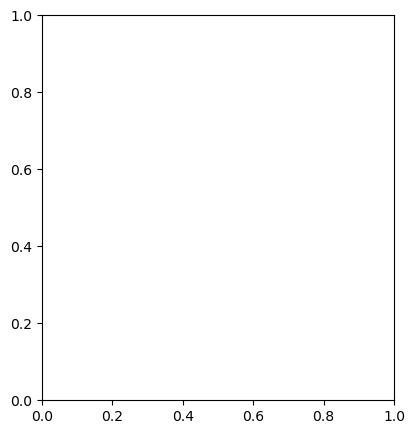

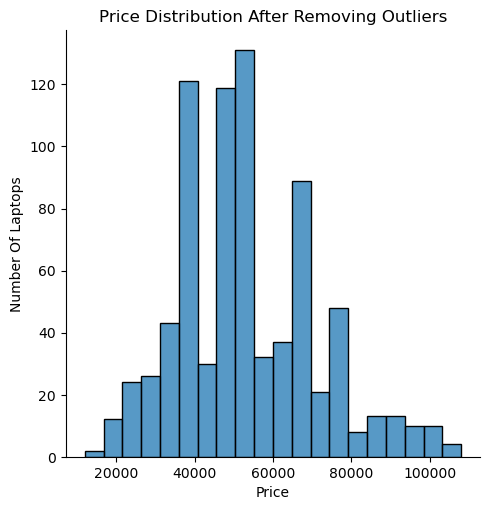

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.displot(col_Price_data[~outliers_Price], kde = False, bins = 20)
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Number Of Laptops')

## Handling Categorical Data

In [17]:
categorical_df

Index(['Brand', 'Model Name', 'Processor', 'Operating System', 'Storage',
       'RAM', 'Screen Size', 'Touch_Screen'],
      dtype='object')

In [18]:
col_to_encode = ['Brand', 'Model Name', 'Processor', 'Operating System', 'Storage',
       'RAM', 'Screen Size', 'Touch_Screen']
encoded_df = pd.get_dummies(df, columns = col_to_encode)
encoded_df.to_csv('encoded_new_laptops.csv', index=False)
encoded_df.head(10)

,Price,Brand_ASUS,Brand_Acer,Brand_Apple,Brand_CHUWI,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_LG,...,Screen Size_40.64 cm (16 inch),Screen Size_40.89 cm (16.1 Inch),Screen Size_40.89 cm (16.1 inch),Screen Size_41.15 cm (16.2 inch),Screen Size_43.94 cm (17.3 Inch),Screen Size_43.94 cm (17.3 inch),Screen Size_90.32 cm (35.56 cm),Screen Size_96.52 cm (38 cm),Touch_Screen_No,Touch_Screen_Yes
0,38990,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37990,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,70990,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,70990,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,70990,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,40990,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,46990,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,27990,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,45990,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Feature Selection

In [19]:
df_before = encoded_df.iloc[:, 1:495]
df_after = encoded_df.iloc[:, 495:]
encoded_df = pd.concat([df_before, encoded_df['Price'], df_after], axis=1)
encoded_df.head(10)

,Brand_ASUS,Brand_Acer,Brand_Apple,Brand_CHUWI,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_LG,Brand_Lenovo,...,Screen Size_40.89 cm (16.1 Inch),Screen Size_40.89 cm (16.1 inch),Screen Size_41.15 cm (16.2 inch),Screen Size_43.94 cm (17.3 Inch),Screen Size_43.94 cm (17.3 inch),Screen Size_90.32 cm (35.56 cm),Screen Size_96.52 cm (38 cm),Touch_Screen_No,Touch_Screen_Yes,Price
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,38990
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,37990
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,49990
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,40990
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,46990
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,27990
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,45990


In [20]:
encoded_df.rename(columns=lambda x: x.replace('Brand_', ''), inplace=True)
encoded_df.rename(columns=lambda x: x.replace('Processor_', ''), inplace=True)
encoded_df.rename(columns=lambda x: x.replace('Operating System_', ''), inplace=True)
encoded_df.rename(columns=lambda x: x.replace('Storage_', ''), inplace=True)
encoded_df.rename(columns=lambda x: x.replace('RAM_', ''), inplace=True)
encoded_df.rename(columns=lambda x: x.replace('Touch_Screen_', ''), inplace=True)

In [21]:
drop_ModelName = [col for col in encoded_df.columns if 'Model Name_' in col]
encoded_df.drop(columns=drop_ModelName, inplace=True)

drop_ScreenSize = [col for col in encoded_df.columns if 'Screen Size_' in col]
encoded_df.drop(columns=drop_ScreenSize, inplace=True)

In [22]:
encoded_df.shape

(837, 81)

## Fitting Model Using Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = encoded_df.iloc[:, :80]
Y = encoded_df.iloc[:, 80:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)
print("R-squared score on training set:", r2_train)
print("R-squared score on test set:", r2_test)


R-squared score on training set: 0.882460873673103
R-squared score on test set: -1.175916141144909e+23


In [24]:
# Important feature using ExtraTreesRegressor

X = X.to_numpy()
Y = Y.to_numpy().ravel()

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [25]:
print(selection.feature_importances_)

[5.45457728e-03 1.17756910e-03 5.04293791e-02 1.74132415e-03
 4.98817937e-03 1.98562122e-04 2.62357214e-03 2.66324396e-02
 3.17214119e-04 6.39599527e-03 6.72534056e-03 2.96302983e-03
 3.52190407e-06 3.15090335e-03 9.61944577e-04 1.16383891e-03
 4.22081588e-03 1.30867528e-05 3.13197416e-06 5.74065896e-06
 2.79922248e-06 3.91761773e-03 2.61322495e-02 8.98178305e-02
 3.11173151e-02 2.60113878e-04 2.84111115e-05 8.44614115e-03
 4.40816019e-04 4.63549714e-05 9.88929184e-04 3.04835615e-06
 6.29316988e-07 7.86436518e-08 3.96214208e-06 5.11291086e-05
 1.31357650e-06 2.93150991e-04 1.84617713e-05 1.83285504e-06
 4.91599674e-03 5.63035931e-04 1.63293478e-02 2.93841624e-07
 3.33449084e-05 1.02845951e-03 1.03327850e-04 2.36138263e-05
 2.51884502e-05 7.36539619e-05 2.39304768e-04 7.08841449e-05
 8.23318299e-03 3.52190407e-06 3.07328750e-04 8.01785260e-04
 1.35323905e-02 2.53322465e-06 3.87874396e-03 3.74911190e-04
 7.53469854e-04 2.84111115e-05 1.50221093e-02 2.80822495e-06
 1.31304014e-03 1.575941

## Fitting Model Using Random Forest

In [26]:
X = encoded_df.iloc[:, :80]
Y = encoded_df.iloc[:, 80:]

X = X.to_numpy()
Y = Y.to_numpy().ravel()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

y_pred = reg_rf.predict(x_test)

print("Accuracy for training data = ", reg_rf.score(x_train, y_train))
print("Accuracy for testing data = ", reg_rf.score(x_test, y_test))

Accuracy for training data =  0.9421102734827285
Accuracy for testing data =  0.6057799670532098


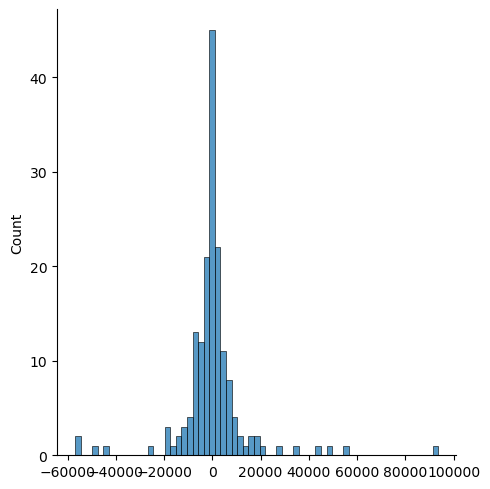

In [27]:
sns.displot(y_test-y_pred)
plt.show()

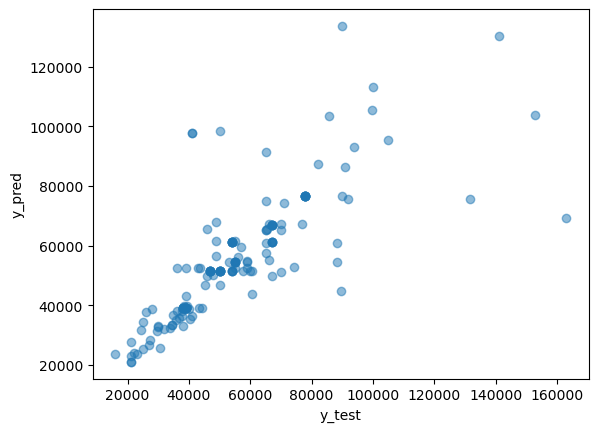

In [28]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [29]:
import numpy as np
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7224.775027006854
MSE: 215030715.84643278
RMSE: 14663.925662878708


In [30]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(Y)-min(Y))

0.0043735374476987455

In [31]:
metrics.r2_score(y_test, y_pred)

0.6057799670532098

## Hyperparameter Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 30, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [33]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [34]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [35]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=110

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [2, 9, 16, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [37]:
prediction = rf_random.predict(x_test)

<Figure size 800x800 with 0 Axes>

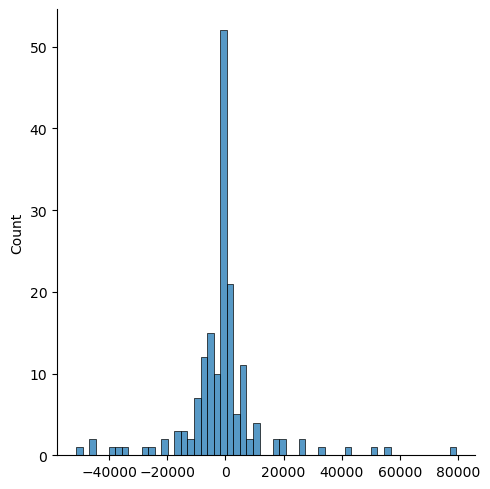

In [38]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

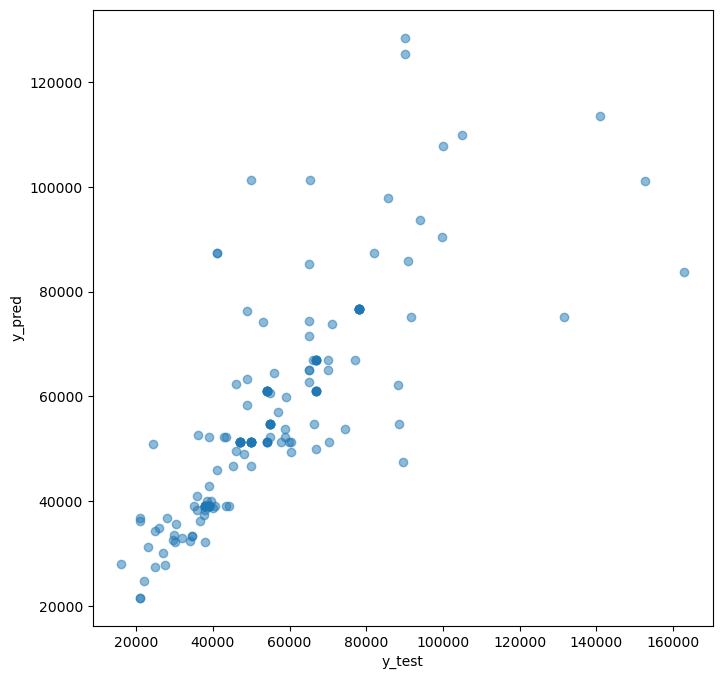

In [39]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7816.755375075371
MSE: 211958295.02783445
RMSE: 14558.787553496151


## Save the model to reuse it again

In [41]:
import pickle
# open a file, where you want to store the data
file = open('LaptopPrice_Predictor.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [42]:
model = open('LaptopPrice_Predictor.pkl','rb')
forest = pickle.load(model)

In [43]:
y_prediction = forest.predict(x_test)

In [44]:
metrics.r2_score(y_test, y_prediction)

0.6114126964591764

In [92]:
new_df = pd.read_csv('new_laptops.csv')
new_df.head()

,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,38990
1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,37990
2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,70990
3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,70990
4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,70990


In [93]:
print(new_df['Brand'].value_counts())


HP           423
ASUS         147
Lenovo        62
DELL          59
Acer          36
MSI           32
Infinix       29
Apple         11
SAMSUNG        9
CHUWI          7
GIGABYTE       5
WINGS          4
ZEBRONICS      4
MICROSOFT      3
Ultimus        2
LG             2
realme         1
Primebook      1
Name: Brand, dtype: int64


In [94]:
print(new_df['Processor'].value_counts())


Core i5                   365
Core i3                   163
Ryzen 5 Hexa Core          82
Core i7                    68
Ryzen 7 Octa Core          67
Celeron Dual Core          16
Ryzen 3 Quad Core          14
Celeron Quad Core          10
Ryzen 5 Quad Core          10
Ryzen 3 Dual Core           7
Athlon Dual Core            4
Core i9                     4
Pentium Silver              4
M2                          3
M1                          3
Ryzen 9 Octa Core           2
Ryzen 5                     2
M1 Max                      1
Ryzen 5 Dual Core           1
Ryzen 7 Quad Core           1
M1 Pro                      1
M3 Pro                      1
M2 Max                      1
MediaTek MT8788             1
Ryzen Z1 Octa Core          1
MediaTek Kompanio 520       1
MediaTek Kompanio 500       1
Ryzen Z1 HexaCore           1
MediaTek Kompanio 1200      1
Ryzen 9 16 Core             1
Name: Processor, dtype: int64


In [95]:
print(new_df['Operating System'].value_counts())

Windows 11 Home    758
Windows 10 Home     27
Chrome              13
Windows 10          10
DOS                  8
Mac OS Monterey      5
Windows 11 Pro       5
Mac OS Big Sur       3
Windows 10 Pro       3
Prime OS             1
Ubuntu               1
macOS Ventura        1
macOS Sonoma         1
Mac OS Mojave        1
Name: Operating System, dtype: int64


In [96]:
print(new_df['Storage'].value_counts())

512 GB    627
1 TB      101
256 GB     49
2 TB       20
128 GB     12
4 TB       10
64 GB       4
3 TB        1
6 TB        1
Name: Storage, dtype: int64


In [97]:
print(new_df['RAM'].value_counts())


8 GB     421
16 GB    377
4 GB      25
32 GB      9
12 GB      2
64 GB      2
18 GB      1
Name: RAM, dtype: int64


In [98]:
print(new_df['Touch_Screen'].value_counts())

No     740
Yes     97
Name: Touch_Screen, dtype: int64


In [99]:
encoded_df.head()

,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,...,Screen Size_40.89 cm (16.1 Inch),Screen Size_40.89 cm (16.1 inch),Screen Size_41.15 cm (16.2 inch),Screen Size_43.94 cm (17.3 Inch),Screen Size_43.94 cm (17.3 inch),Screen Size_90.32 cm (35.56 cm),Screen Size_96.52 cm (38 cm),No,Yes,Price
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,38990
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,37990
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,70990


In [105]:
distinct_val = new_df['Processor'].unique()
for i in distinct_val:
    print(i.replace(' ', '_'), ',')

Core_i3 ,
M1 ,
Core_i7 ,
Core_i5 ,
Ryzen_5_Hexa_Core ,
Celeron_Dual_Core ,
Ryzen_7_Octa_Core ,
Ryzen_5_Quad_Core ,
Ryzen_3_Dual_Core ,
Ryzen_3_Quad_Core ,
M2 ,
Celeron_Quad_Core ,
Athlon_Dual_Core ,
MediaTek_Kompanio_1200 ,
Ryzen_9_Octa_Core ,
MediaTek_MT8788 ,
Ryzen_Z1_HexaCore ,
MediaTek_Kompanio_500 ,
Core_i9 ,
MediaTek_Kompanio_520 ,
Ryzen_Z1_Octa_Core ,
Pentium_Silver ,
Ryzen_5 ,
M1_Max ,
M2_Max ,
M3_Pro ,
M1_Pro ,
Ryzen_7_Quad_Core ,
Ryzen_5_Dual_Core ,
Ryzen_9_16_Core ,


In [ ]:
# -------------------------------------------------------------
        # -------------------------------------------------------------
        # -------------------------------------------------------------
        # -------------------------------------------------------------           
            
        # Processors